## Want to explore different loan types

In [95]:
import os
import pandas as pd 
import glob
import random 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
os.listdir()

['Well_Being.ipynb',
 'info.pdf',
 '.DS_Store',
 'Exploration_LoanInformalGroup_Ella.ipynb',
 'different_loan_types_julia.ipynb',
 'Demographics_Education_Julia.ipynb',
 'Demo_Individual.ipynb',
 'House Ownership.ipynb',
 'diaries_transactions_all.csv',
 'consumption_julia.ipynb',
 'Exploration_LoanP2P_Ella.ipynb',
 'README.md',
 'Goings-On.ipynb',
 '.gitignore',
 'Exploration_Ella.ipynb',
 '.ipynb_checkpoints',
 '.git',
 'Exploration_Loan_Ella.ipynb',
 'initial_exploration_julia.ipynb',
 'aux_data']

In [3]:
trx = pd.read_csv('diaries_transactions_all.csv', low_memory=False)

In [4]:
pd.set_option('display.max_columns',200)

In [5]:
trx.shape

(483949, 58)

In [6]:
trx.columns

Index(['hh_ids', 'unique_hhs', 'first_trx_date_hh', 'last_trx_date_hh',
       'tot_hh_daysofobs', 'tot_hh_monthsofobs', 'interview_designation',
       'int_date', 'int_month', 'int_year', 'int_yr_mo', 'first_int_date',
       'account_ids', 'unique_accnts', 'm_ids_owner', 'unique_hm_owner',
       'account_bsheet_desig', 'account_startclose_balance', 'account_formal',
       'account_liquid', 'first_trx_date_acc', 'last_trx_date_acc',
       'tot_acc_daysofobs', 'tot_acc_monthsofobs', 'trx_id', 'm_ids_trx',
       'trx_date', 'trx_month', 'trx_year', 'trx_yr_mo', 'trx_dq_round',
       'trx_stdtime_days_hh', 'trx_stdtime_mnths_hh', 'trx_stdtime_days_acc',
       'trx_stdtime_mnths_acc', 'trx_class_code', 'trx_class_desc',
       'trx_family_code', 'trx_family_desc', 'trx_type_code', 'trx_type_desc',
       'trx_prx_purpose', 'trx_prx_purpose_fd', 'trx_fee',
       'trx_bsheet_direction', 'trx_mode_code', 'trx_mode_desc',
       'trx_place_incommunity', 'trx_distance_km', 'trx_outlet'

## Account questions: 

### How many accounts are there? 

In [7]:
len(trx.account_ids.unique())

9547

Is this the same as unique_accounts ? 

In [8]:
trx.unique_accnts.value_counts()

1.0    9546
Name: unique_accnts, dtype: int64

Yup. 

### Account types?

In [9]:
trx.account_bsheet_desig.value_counts()

Asset        52021
Liability    23078
Insurance     1971
Name: account_bsheet_desig, dtype: int64

### How many unique liabilities accounts, e.g. loans?  

In [10]:
trx.loc[trx['unique_accnts']==1].shape

(9546, 58)

In [11]:
trx.loc[trx['unique_accnts']==1].account_bsheet_desig.value_counts()

Asset        2828
Liability    1906
Insurance     254
Name: account_bsheet_desig, dtype: int64

1906 loans in total to work with. 

### How many of these accounts are formal? 

In [12]:
trx.loc[trx['unique_accnts']==1].loc[trx['account_bsheet_desig']=="Liability"].account_formal.value_counts()

Informal    1691
Formal       215
Name: account_formal, dtype: int64

### What kinds of transactions are happening with liabilities? 

In [13]:
trx.loc[trx['account_bsheet_desig']=="Liability"].trx_family_code.value_counts()

INFP2P     14755
SUPPCRD     4050
FRMLN       1429
INFGRP      1377
ARREARS     1058
ADVANCE      280
EMPLN        111
PAWN          16
OTHER          2
Name: trx_family_code, dtype: int64

In [14]:
trx.loc[trx['account_bsheet_desig']=="Liability"].trx_family_desc.value_counts()

Informal P2P                              14755
Supplier credit                            4050
Formal loan                                1429
Informal group                             1377
Arrears owed to or owed by respondents     1058
Advance                                     280
Loan from employer                          111
Pawning assets                               16
Other                                         2
Name: trx_family_desc, dtype: int64

### What transactions are in "informal" loan categories, and which are in the "formal" categories? 

In [15]:
trx.loc[trx['account_bsheet_desig']=="Liability"].loc[trx['account_formal']=="Formal"].trx_family_desc.value_counts()

Supplier credit    2973
Formal loan        1276
Other                 2
Name: trx_family_desc, dtype: int64

In [16]:
trx.loc[trx['account_bsheet_desig']=="Liability"].loc[trx['account_formal']=="Informal"].trx_family_desc.value_counts()

Informal P2P                              14755
Informal group                             1377
Supplier credit                            1077
Arrears owed to or owed by respondents     1058
Advance                                     280
Formal loan                                 153
Loan from employer                          111
Pawning assets                               16
Name: trx_family_desc, dtype: int64

### How many closing balances of a formal loan are recorded? 

In [17]:
trx.loc[trx['account_bsheet_desig']=="Liability"].loc[trx['account_formal']=="Formal"].account_startclose_balance.value_counts()


Close    201
Start     77
Name: account_startclose_balance, dtype: int64

### For those listed as a closing balance, how many are zero? 

In [18]:
trx.loc[trx['account_bsheet_desig']=="Liability"].loc[trx['account_formal']=="Formal"].loc[trx['account_startclose_balance']=='Close'].trx_value_kes.value_counts().head()


0.0       114
20.0        5
50.0        4
10.0        4
1075.0      2
Name: trx_value_kes, dtype: int64

### What is the average number of days these liability accounts are observed? 

All liabilities: 

In [19]:
trx.loc[trx['unique_accnts']==1].loc[trx['account_bsheet_desig']=="Liability"].tot_acc_daysofobs.mean()

221.24186778593915

Formal liabilities: 

In [20]:
trx.loc[trx['unique_accnts']==1].loc[trx['account_bsheet_desig']=="Liability"].loc[trx['account_formal']=='Formal'].tot_acc_daysofobs.mean()

236.05116279069767

### For all of the loans, how many unique HH IDs are there, and how many unique owners are there? 

In [28]:
unique_loans = trx.loc[trx['unique_accnts']==1].loc[trx['account_bsheet_desig']=="Liability"]

In [26]:
len(unique_loans.hh_ids.unique())

291

In [27]:
len(unique_loans.m_ids_owner.unique())

436

## What do different loan types look like in terms of data? 

### Formal Liabilities: FRMLN

In [33]:
unique_loans.loc[trx['account_formal']=='Formal'].trx_family_code.value_counts()

FRMLN      133
SUPPCRD     82
Name: trx_family_code, dtype: int64

In [34]:
unique_loans.loc[trx['account_formal']=='Formal'].trx_family_desc.value_counts()

Formal loan        133
Supplier credit     82
Name: trx_family_desc, dtype: int64

In [69]:
random.seed(1)
a = random.choice(unique_loans.loc[trx['trx_family_code']=='FRMLN']["account_ids"].unique())

In [78]:
FRMLNa = trx[trx["account_ids"]==a]

In [81]:
FRMLNa = FRMLNa.copy()

In [82]:
FRMLNa.sort_values("trx_stdtime_days_acc", inplace=True)

In [85]:
for index, row in FRMLNa.iterrows():
    if FRMLNa.loc[index,"trx_bsheet_direction"]=="Increase":
        FRMLNa.at[index,"trx_val_dir"] = FRMLNa.loc[index,"trx_value_kes"]
    elif FRMLNa.loc[index,"trx_bsheet_direction"]=="Decrease":
        FRMLNa.at[index,"trx_val_dir"] = -FRMLNa.loc[index,"trx_value_kes"]
    else:
        print("Error neither increase nor decrease at index" + index)

In [86]:
FRMLNa[["trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_direction","trx_bsheet_direction","trx_val_dir"]]

,trx_stdtime_days_acc,trx_value_kes,trx_prx_purpose,trx_direction,trx_bsheet_direction,trx_val_dir
8312,0,38000.0,1. Starting balance (today),NaN,Increase,38000.0
5456,18,3400.0,3. Payments,Outflow,Decrease,-3400.0
13411,19,304.0,4. Any known fees,NaN,Increase,304.0
6497,49,3400.0,3. Payments,Outflow,Decrease,-3400.0
17163,49,270.0,3. Payments,Outflow,Decrease,-270.0
4513,80,3400.0,3. Payments,Outflow,Decrease,-3400.0
19338,80,270.0,3. Payments,Outflow,Decrease,-270.0
454057,112,3400.0,3. Payments,Outflow,Decrease,-3400.0
438450,139,2100.0,3. Payments,Outflow,Decrease,-2100.0
438564,170,2100.0,3. Payments,Outflow,Decrease,-2100.0


In [90]:
FRMLNa.insert(59,"bal_evol",np.zeros(FRMLNa.shape[0]))

In [91]:
s=0
for index,row in FRMLNa.iterrows():
    s+=FRMLNa.loc[index,"trx_val_dir"]
    FRMLNa.at[index,"bal_evol"]=s

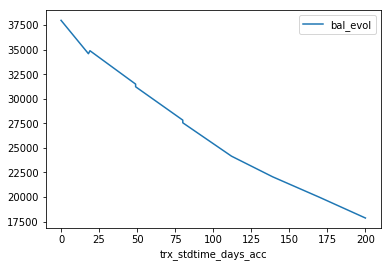

In [96]:
FRMLNa.plot(x="trx_stdtime_days_acc",y="bal_evol")

### Formal Liabilities: SUPPCRD

In [106]:
random.seed(2)
a = random.choice(unique_loans.loc[trx['trx_family_code']=='SUPPCRD']["account_ids"].unique())

In [110]:
unique_suppcrd_trx = unique_loans.loc[trx['trx_family_code']=='SUPPCRD']["account_ids"].unique()

array(['50136878822000000', '57135223754100000', '57134676182300000',
       '57137524306300000', '63135288093300000', '60137783227600000',
       '58135920263600000', '58136004000800000', '59135877834100000',
       '50139088311500000', '63135107500700000', '56135248674800000',
       '62136007083200000', '60136057408300000', '59135274677100000',
       '57136612748000000', '59137714992800000', '60135392548800000',
       '65135953191700000', '62135961838200000', '57135254546100000',
       '63137627556700000', '60135469741800000', '62135954274100000',
       '65134744520000000', '89137948949600000', '58135965411900000',
       '89138561248700000', '89135767680000000', '89135918743300000',
       '89136747851100000', '89138561182100000', '89136083469300000',
       '60134752365300000', '50138189663900000', '50135219190800000',
       '60135175549300000', '105136827062800000', '63135290342200000',
       '57137888347200000', '57134752609900000', '62135818010100000',
       '57135134172

In [107]:
SUPPCRDa = trx[trx["account_ids"]==a]

In [108]:
SUPPCRDa = SUPPCRDa.copy()

In [109]:
SUPPCRDa.head()

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
3677,KVIHC31,NaN,03sep2012,25sep2013,387,13,04=Diaries Interview,25sep2013,9,2013,2013_09,27aug2012,59135274677100000,NaN,59134363516700000,NaN,Liability,Close,Formal,NaN,16mar2013,25sep2013,193,6,59138017096600000,59134363516700000,25sep2013,9,2013,2013_09,19.0,387,13,193,6,findev,"Borrowing, lending, savings or insurance media...",SUPPCRD,Supplier credit,4214,Okoa Jahazi,Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,0.0,0.000000,0,NaN,NaN,NaN,13.344830
3820,KVIHC31,NaN,03sep2012,25sep2013,387,13,04=Diaries Interview,18mar2013,3,2013,2013_03,27aug2012,59135274677100000,1.0,59134363516700000,NaN,Liability,NaN,Formal,NaN,16mar2013,25sep2013,193,6,59136359710700000,59134363516700000,16mar2013,3,2013,2013_03,7.0,194,6,0,0,findev,"Borrowing, lending, savings or insurance media...",SUPPCRD,Supplier credit,4214,Okoa Jahazi,New airtime on credit/new borrowing,New borrowing on financial liability,0.0,Increase,8.0,Purchase on credit/arrears,NaN,NaN,NaN,Inflow,18.0,0.211765,0,NaN,NaN,NaN,6.689655
3821,KVIHC31,NaN,03sep2012,25sep2013,387,13,04=Diaries Interview,18mar2013,3,2013,2013_03,27aug2012,59135274677100000,NaN,59134363516700000,NaN,Liability,NaN,Formal,NaN,16mar2013,25sep2013,193,6,59136359730000000,59134363516700000,16mar2013,3,2013,2013_03,7.0,194,6,0,0,findev,"Borrowing, lending, savings or insurance media...",SUPPCRD,Supplier credit,4214,Okoa Jahazi,Fee for using service (10% of repayment),NaN,0.0,Increase,16.0,Automatic,NaN,NaN,NaN,NaN,2.0,0.023529,0,NaN,NaN,NaN,6.689655
10202,KVIHC31,NaN,03sep2012,25sep2013,387,13,04=Diaries Interview,30aug2013,8,2013,2013_08,27aug2012,59135274677100000,NaN,59134363516700000,NaN,Liability,NaN,Formal,NaN,16mar2013,25sep2013,193,6,59137784577700000,59134363516700000,24aug2013,8,2013,2013_08,18.0,355,12,161,5,findev,"Borrowing, lending, savings or insurance media...",SUPPCRD,Supplier credit,4214,Okoa Jahazi,New airtime on credit/new borrowing,New borrowing on financial liability,0.0,Increase,8.0,Purchase on credit/arrears,NaN,NaN,NaN,Inflow,9.0,0.105882,0,NaN,NaN,NaN,12.241380
10647,KVIHC31,NaN,03sep2012,25sep2013,387,13,04=Diaries Interview,29apr2013,4,2013,2013_04,27aug2012,59135274677100000,NaN,59134363516700000,NaN,Liability,NaN,Formal,NaN,16mar2013,25sep2013,193,6,59136723798000000,59134363516700000,15apr2013,4,2013,2013_04,10.0,224,7,30,1,findev,"Borrowing, lending, savings or insurance media...",SUPPCRD,Supplier credit,4214,Okoa Jahazi,New airtime on credit/new borrowing,New borrowing on financial liability,0.0,Increase,8.0,Purchase on credit/arrears,NaN,NaN,NaN,Inflow,18.0,0.211765,0,NaN,NaN,NaN,7.724138


In [105]:
SUPPCRDa.sort_values("trx_stdtime_days_acc", inplace=True)